## Linear regression using Batch Gradient Descent

In [62]:
import numpy as np
import matplotlib.pyplot as plt
# Uniformly distributed array with dimension (100, 1)
X = 2 * np.random.rand(100, 1)

# Normally distributed array with noise
y = 4 + 3 * X + np.random.randn(100, 1)

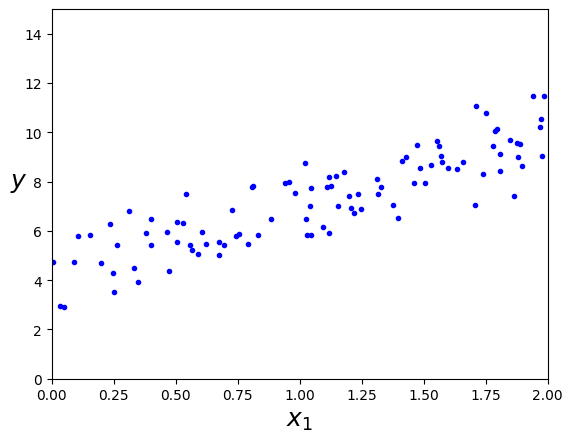

In [63]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [64]:
# Add Bias term x0 = 1
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

X_b

array([[1.        , 1.79647613],
       [1.        , 1.55360666],
       [1.        , 0.15295991],
       [1.        , 1.9734582 ],
       [1.        , 0.54273193],
       [1.        , 0.19716585],
       [1.        , 1.65862847],
       [1.        , 1.41335107],
       [1.        , 1.23443761],
       [1.        , 0.31196173],
       [1.        , 0.95699223],
       [1.        , 1.56111205],
       [1.        , 0.60724788],
       [1.        , 0.62337966],
       [1.        , 0.00628181],
       [1.        , 0.3484868 ],
       [1.        , 1.75081125],
       [1.        , 0.88349298],
       [1.        , 1.968469  ],
       [1.        , 0.79141593],
       [1.        , 1.43037291],
       [1.        , 0.56383809],
       [1.        , 0.72761928],
       [1.        , 0.38145198],
       [1.        , 0.69412474],
       [1.        , 1.09447504],
       [1.        , 1.98354576],
       [1.        , 1.32840343],
       [1.        , 0.39849191],
       [1.        , 0.08992288],
       [1.

In [65]:
eta = 0.01 # Learning rate
n_iterations = 150 # Number of Iterations
m = 100 # Number of elements in training set
theta = np.random.randn(2,1) # Ramdom initialization of weights

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    print(theta)

[[1.13725348]
 [0.43559002]]
[[1.25045294]
 [0.57320032]]
[[1.35842833]
 [0.70429575]]
[[1.46142429]
 [0.82918184]]
[[1.55967395]
 [0.9481498 ]]
[[1.65339956]
 [1.06147717]]
[[1.74281292]
 [1.16942851]]
[[1.82811592]
 [1.27225597]]
[[1.90950098]
 [1.37019987]]
[[1.98715151]
 [1.46348929]]
[[2.06124233]
 [1.55234255]]
[[2.13194005]
 [1.63696774]]
[[2.19940347]
 [1.7175632 ]]
[[2.26378398]
 [1.79431799]]
[[2.32522584]
 [1.86741228]]
[[2.38386656]
 [1.93701782]]
[[2.43983721]
 [2.00329829]]
[[2.49326272]
 [2.06640971]]
[[2.54426216]
 [2.12650079]]
[[2.59294902]
 [2.18371325]]
[[2.63943146]
 [2.23818219]]
[[2.68381261]
 [2.29003636]]
[[2.72619071]
 [2.3393985 ]]
[[2.76665945]
 [2.38638556]]
[[2.8053081 ]
 [2.43110904]]
[[2.84222174]
 [2.4736752 ]]
[[2.87748149]
 [2.51418533]]
[[2.91116465]
 [2.55273594]]
[[2.9433449 ]
 [2.58941906]]
[[2.97409248]
 [2.62432239]]
[[3.00347431]
 [2.65752949]]
[[3.0315542 ]
 [2.68912005]]
[[3.05839296]
 [2.71917   ]]
[[3.08404856]
 [2.7477517 ]]
[[3.10857624]


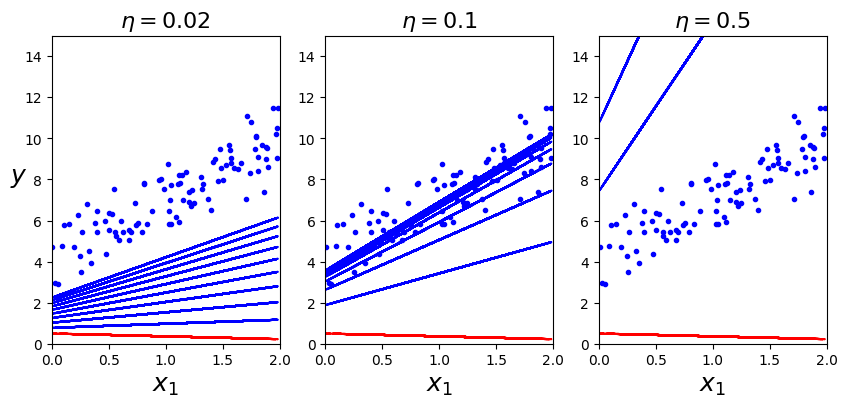

In [66]:
# Plot Gradient Descent for various learning rates

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

##Stochastic Gradient Descent

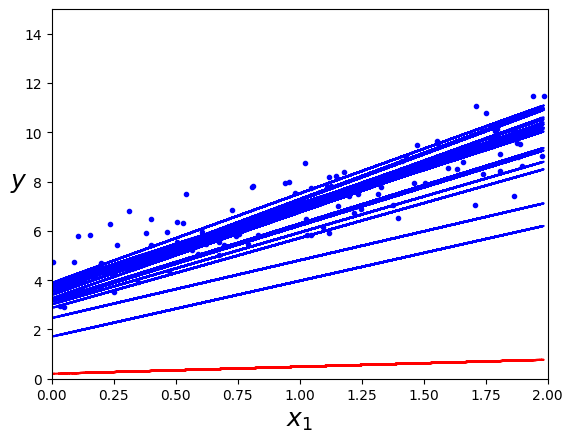

array([[4.20200141],
       [2.88959857]])

In [71]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
theta_path_sgd = []
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

theta

## Mini-Batch Gradient Descent

In [69]:
# Let's implement Mini-batch gradient descent

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[3.76008597],
       [3.20507739]])

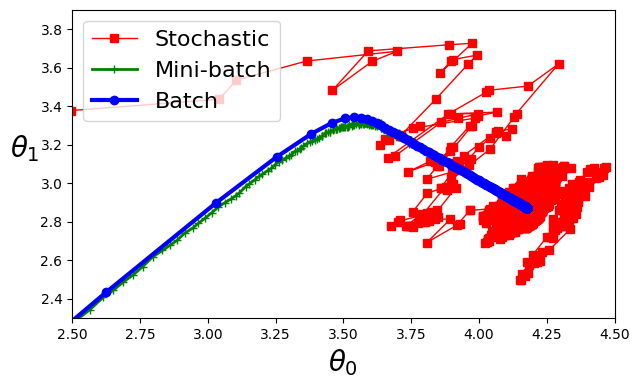

In [70]:
# Plot paths taken by the three Gradient Descent algorithms during training

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()